In [3]:
import pandas as pd
import numpy as np

## Object creation

In [5]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
dates = pd.date_range("20130101", periods=6)
dates
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.318883,-1.068155,0.208572,-0.431007
2013-01-02,1.098823,-1.437148,0.324395,-0.496362
2013-01-03,0.358766,-1.770641,0.648060,0.306492
2013-01-04,0.896468,1.706978,0.191310,-0.592391
2013-01-05,-0.506015,-0.581844,0.377882,-0.345292
2013-01-06,-1.004837,-1.612894,-0.445819,1.773740


## Skip a lot of content

Coz I didn't use jupyter notebook from the start.

## Join (pd.merge)

SQL style baby!

In [12]:
left = pd.DataFrame({"key": ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({"key": ['foo', 'foo'], 'rval': [4, 5]})
print(left)
print(right)

pd.merge(left, right, on='key')

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [13]:
left = pd.DataFrame({"key": ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({"key": ['foo', 'bar'], 'rval': [4, 5]})
print(left)
print(right)

pd.merge(left, right, on='key')

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


In [17]:
df = pd.DataFrame(
{
    "A": ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    "B": ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    "C": range(1, 9),
    "D": range(-1, -9, -1),
})

df

,A,B,C,D
0,foo,one,1,-1
1,bar,one,2,-2
2,foo,two,3,-3
3,bar,three,4,-4
4,foo,two,5,-5
5,bar,two,6,-6
6,foo,one,7,-7
7,foo,three,8,-8


In [18]:
df.groupby("A").sum()

,C,D
A,,
bar,12,-12
foo,24,-24


In [20]:
df.groupby(['A', "B"]).sum()

C  D
A   B          
bar one    2 -2
    three  4 -4
    two    6 -6
foo one    8 -8
    three  8 -8
    two    8 -8

## Stack

Index has *multiple levels*. We call it type **MultiIndex**.

In [24]:
tuples = list(
    zip(
        *[
            ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
            ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'],
        ]
    )
)
print(tuples)

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print(index)

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", 'B'])
print(df)
                  
df2 = df[:4]

df2

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]
                     A         B
first second                    
bar   one    -0.893209 -0.106657
      two     1.056129 -0.168638
baz   one    -0.648741  0.437055
      two     0.945491  1.310148
foo   one     0.949869 -0.731391
      two    -0.274559 -0.681512
qux   one    -0.576053 -0.925177
      two    -1.759548 -1.948380


A         B
first second                    
bar   one    -0.893209 -0.106657
      two     1.056129 -0.168638
baz   one    -0.648741  0.437055
      two     0.945491  1.310148

In [27]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.893209
               B   -0.106657
       two     A    1.056129
               B   -0.168638
baz    one     A   -0.648741
               B    0.437055
       two     A    0.945491
               B    1.310148
dtype: float64

In [28]:
stacked.unstack()

A         B
first second                    
bar   one    -0.893209 -0.106657
      two     1.056129 -0.168638
baz   one    -0.648741  0.437055
      two     0.945491  1.310148

In [30]:
stacked.unstack(index=1)

TypeError: unstack() got an unexpected keyword argument 'index'

## pivot tables

In [33]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-1.319794,2.378447
1,one,B,foo,-0.400071,-0.171593
2,two,C,foo,-0.591331,0.751459
3,three,A,bar,-1.028712,-0.399026
4,one,B,bar,-1.246723,0.603249
5,one,C,bar,-2.802847,-1.011751
6,two,A,foo,-0.146249,-0.222296
7,three,B,foo,-0.328843,0.745139
8,one,C,foo,-0.552019,0.422850
9,one,A,bar,0.118182,0.165326


In [34]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.118182 -1.319794
      B -1.246723 -0.400071
      C -2.802847 -0.552019
three A -1.028712       NaN
      B       NaN -0.328843
      C  0.270880       NaN
two   A       NaN -0.146249
      B  0.693283       NaN
      C       NaN -0.591331

Skip a lot more.....

## Plotting

In [1]:
import matplotlib.pyplot as plt
plt.close('all')

<AxesSubplot:>

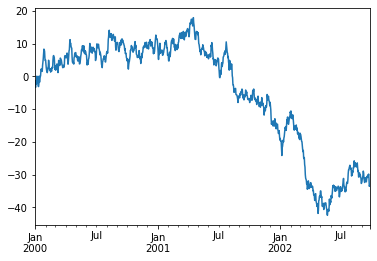

In [7]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()  # call on pandas series, not calling matplotlib function. What!
# plt.show()   # required if not using jupyter notebook

<Figure size 432x288 with 0 Axes>

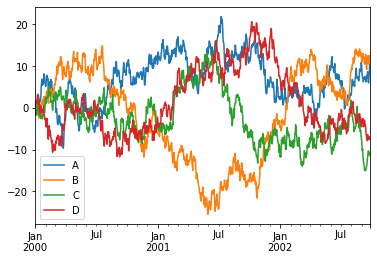

In [11]:
df = pd.DataFrame(
  np.random.randn(1000, 4), index=ts.index, columns=list("ABCD")
)

df = df.cumsum()

plt.figure()

df.plot()                       # plot on DataFrame gives multiseries line chart

plt.legend(loc='best')

## Import Export

In [12]:
df.to_csv("foo.csv")

In [14]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.149515,0.579575,0.026407,0.073157
1,2000-01-02,0.322729,0.777214,-1.254792,0.432915
2,2000-01-03,-1.667950,1.345506,-0.535006,1.053837
3,2000-01-04,-1.731927,1.302725,-0.126649,1.709682
4,2000-01-05,-1.147468,0.394556,-1.471604,1.397524
...,...,...,...,...,...
995,2002-09-22,5.998530,10.542720,-10.473476,-7.108508
996,2002-09-23,7.763191,11.509830,-10.590194,-7.435597
997,2002-09-24,8.212709,12.092841,-11.154986,-7.586152
998,2002-09-25,10.803468,12.585680,-10.707393,-6.984499


In [16]:
df.to_excel("foo.xlsx", sheet_name='Sheet1')

ModuleNotFoundError: No module named 'openpyxl'

In [17]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

FileNotFoundError: [Errno 2] No such file or directory: 'foo.xlsx'